In [1]:
access_token = '55912918-VQ7WOWoK5TJrr7xe3QoGoZuDYWCzTNabStca4HLiL'
access_token_secret = 'rNO2k1GKdkINCLJwAlEiRLjX1dv5lKOt2YGk2mkXfmgLl'
consumer_key = 'PIBFZiGZUEG074tlpa7joYZrL'
consumer_secret = 'bGtKa7aCTjuw5TZ9lggr5IML8AlEhJpxat1HNdOw8iHB8VR5lF'

import tweepy
import numpy as np
import pandas as pd

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
for tweet in api.search('gunung tangkuban parahu erupsi'):
    print(tweet.text)

RT @BNPB_Indonesia: Gunungapi Tangkuban Parahu merupakan gunung api aktif yg berada di wilayah administrasi Kabupaten Bandung Barat  Kabupa…
RT @Antara_Jabar: Ketua DPRD&amp;amp;nbsp;Jabar, Ineu&amp;amp;nbsp;Purwadewi&amp;amp;nbsp;meminta warga untuk tetap waspada dan mematuhi segala instruk…
RT @AdriellSakhi: Stay save ya yang di sana Erupsi gunung tangkuban parahu
#tangkubanparahu
#bandung
#jawabarat
#erupsi https://t.co/h7py54…
RT @IneuPurwadewiS: Ketua DPRD Jabar, Ineu Purwadewi meminta warga untuk tetap waspada dan mematuhi segala instruksi yang diberikan terkait…
Kondisi Gunung Tangkuban Parahu Pasca Erupsi https://t.co/BuiF5WbSk4
RT @korantempo: Kondisi Gunung Tangkuban Parahu Pasca Erupsi https://t.co/Mfqwy8D8Ld
RT @korantempo: Kondisi Gunung Tangkuban Parahu Pasca Erupsi https://t.co/Mfqwy8D8Ld
Kondisi Gunung Tangkuban Parahu Pasca Erupsi https://t.co/Mfqwy8D8Ld
Pasca erupsi Gunung Tangkuban Parahu saat ini masih tertutup abu vulkanik setebal 5 cm https://t.co/Nq9CRjpmws
RT @a

In [4]:
df = pd.DataFrame(columns = ['Tweets', 'User', 'User_statuses_count', 
                             'user_followers', 'User_location', 'User_verified',
                             'fav_count', 'rt_count', 'tweet_date'])

In [5]:
def stream(data, file_name):
    i = 0
    #for tweet in tweepy.Cursor(api.search, q=data, count=100, lang='en').items():
    for tweet in tweepy.Cursor(api.search, q=data, count=100).items():
        print(i, end='\r')
        df.loc[i, 'Tweets'] = tweet.text
        df.loc[i, 'User'] = tweet.user.name
        df.loc[i, 'User_statuses_count'] = tweet.user.statuses_count
        df.loc[i, 'user_followers'] = tweet.user.followers_count
        df.loc[i, 'User_location'] = tweet.user.location
        df.loc[i, 'User_verified'] = tweet.user.verified
        df.loc[i, 'fav_count'] = tweet.favorite_count
        df.loc[i, 'rt_count'] = tweet.retweet_count
        df.loc[i, 'tweet_date'] = tweet.created_at
        #df.to_excel('{}.xlsx'.format(file_name))
        df.to_csv('{}.csv'.format(file_name))
        i+=1
        if i == 5000:
            break
        else:
            pass

In [6]:
stream(data = ['gunung tangkuban parahu erupsi'], file_name = 'my_tweets_tangkuban_parahu_malam')

In [7]:
df.head()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,fav_count,rt_count,tweet_date
0,RT @BNPB_Indonesia: Gunungapi Tangkuban Parahu...,Beby 🖤,665,291,Indonesia,False,0,11,2019-07-27 17:57:28
1,RT @Antara_Jabar: Ketua DPRD&amp;amp;nbsp;Jaba...,Set DPRD Prov. Jabar,10408,10318,"Kota Bandung, Jawa Barat",False,0,1,2019-07-27 17:01:46
2,RT @AdriellSakhi: Stay save ya yang di sana Er...,Cherry O. Ainsley,324,10,,False,0,1,2019-07-27 17:01:41
3,"RT @IneuPurwadewiS: Ketua DPRD Jabar, Ineu Pur...",Set DPRD Prov. Jabar,10408,10318,"Kota Bandung, Jawa Barat",False,0,6,2019-07-27 17:01:09
4,Kondisi Gunung Tangkuban Parahu Pasca Erupsi h...,Tempo News Room,650772,714397,Indonesia,True,1,1,2019-07-27 17:00:30


In [8]:
df.tail()

,Tweets,User,User_statuses_count,user_followers,User_location,User_verified,fav_count,rt_count,tweet_date
4451,RT @PRFMnews: Erupsi Gunung Tangkuban Parahu t...,Arif Dhani R.,4106,181,"Bandung Kulon, Indonesia",False,0,562,2019-07-26 09:50:19
4452,RT @PRFMnews: Erupsi Gunung Tangkuban Parahu t...,AnDiana Moedasir™,334136,4660,Jurusan Cibiru - Kebon Kalapa,False,0,562,2019-07-26 09:50:15
4453,RT @PRFMnews: Erupsi Gunung Tangkuban Parahu t...,Andri Gunawan S.,62516,445,022,False,0,562,2019-07-26 09:50:11
4454,"Telah terjadi erupsi Gunung Tangkuban Parahu, ...",Info.Baleendah,12277,594,,False,2,1,2019-07-26 09:49:34
4455,Erupsi Gunung Tangkuban Parahu tanggal 26 Juli...,Radio PRFM Bandung,582754,232500,"Bandung, West Java, Indonesia",False,184,562,2019-07-26 09:48:54


In [9]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
#import chart_studio
#import chart_studio.plotly as py
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4456 entries, 0 to 4455
Data columns (total 9 columns):
Tweets                 4456 non-null object
User                   4456 non-null object
User_statuses_count    4456 non-null object
user_followers         4456 non-null object
User_location          4456 non-null object
User_verified          4456 non-null object
fav_count              4456 non-null object
rt_count               4456 non-null object
tweet_date             4456 non-null object
dtypes: object(9)
memory usage: 508.1+ KB


In [10]:
#query berdasarkan user location
data = pd.read_csv('my_tweets_tangkuban_parahu_malam.csv')
data_location = data.groupby(['User_location'])
data_location.count()


,Unnamed: 0,Tweets,User,User_statuses_count,user_followers,User_verified,fav_count,rt_count,tweet_date
User_location,,,,,,,,,
,3,3,3,3,3,3,3,3,3
#LFC Family,1,1,1,1,1,1,1,1,1
+6285974518889,1,1,1,1,1,1,1,1,1
GOT7 • TEAM WANG • AOMG,1,1,1,1,1,1,1,1,1
Indonesia,3,3,3,3,3,3,3,3,3
JY,1,1,1,1,1,1,1,1,1
Jabar,2,2,2,2,2,2,2,2,2
Jakarta,1,1,1,1,1,1,1,1,1
Marhaban Yaa Ramadan 🌙✨,1,1,1,1,1,1,1,1,1


In [11]:
#query berdasarkan user tweet_date
data = pd.read_csv('my_tweets_tangkuban_parahu_malam.csv')
from datetime import datetime, timedelta

seven_hours_from_now = datetime.now() + timedelta(hours=7)
#'{:%H:%M:%S}'.format(seven_hours_from_now)

#datetime.datetime(2012, 12, 3, 23, 24, 31, 774118)
#ata_tweet_date = data.groupby(['tweet_date'])

#ata_tweet_date.count()

d = data.values
d.shape

print ('Jumlah tweet Tanggal 26 Juli 2019')
count_enam_ke_delapan_26 = 0
for i in range(d.shape[0]):
    #di mulai menghitung dari tanggal kejadian
    if (d[i:i+1,9] > "2019-07-26 06:00:00") & (d[i:i+1,9] < "2019-07-26 08:00:00"):
        count_enam_ke_delapan_26 = count_enam_ke_delapan_26 + 1
        #print(d[i:i+1,1])
print ('Jam 06.00 sd 08.00 : '  + str(count_enam_ke_delapan_26)) 


count_delapan_ke_sepuluh_26 = 0
for i in range(d.shape[0]):
    #di mulai menghitung dari tanggal kejadian
    if (d[i:i+1,9] > "2019-07-26 08:00:00") & (d[i:i+1,9] < "2019-07-26 10:00:00"):
        count_delapan_ke_sepuluh_26 = count_delapan_ke_sepuluh_26 + 1
        #print(d[i:i+1,1])
print ('Jam 08.00 sd 10.00 : '  + str(count_delapan_ke_sepuluh_26)) 
#print(count_delapan_ke_sepuluh_26)

count_sepuluh_ke_duabelas_26 = 0
for i in range(d.shape[0]):
    #di mulai menghitung dari tanggal kejadian
    if (d[i:i+1,9] > "2019-07-26 10:00:00") & (d[i:i+1,9] < "2019-07-26 12:00:00"):
        count_sepuluh_ke_duabelas_26 = count_sepuluh_ke_duabelas_26 + 1
        #print(d[i:i+1,1])
      
print ('Jam 10.00 sd 12.00 : ' + str(count_sepuluh_ke_duabelas_26))        
#print(count_sepuluh_ke_duabelas_26)

count_duabelas_ke_empat_belas_26 = 0
for i in range(d.shape[0]):
    #di mulai menghitung dari tanggal kejadian
    if (d[i:i+1,9] > "2019-07-26 12:00:00") & (d[i:i+1,9] < "2019-07-26 14:00:00"):
        count_duabelas_ke_empat_belas_26 = count_duabelas_ke_empat_belas_26 + 1
        #print(d[i:i+1,1])
print ('Jam 12.00 sd 14.00 : ' + str(count_duabelas_ke_empat_belas_26))  

count_empatbelas_ke_enam_belas_26 = 0
for i in range(d.shape[0]):
    #di mulai menghitung dari tanggal kejadian
    if (d[i:i+1,9] > "2019-07-26 14:00:00") & (d[i:i+1,9] < "2019-07-26 16:00:00"):
        count_empatbelas_ke_enam_belas_26 = count_empatbelas_ke_enam_belas_26 + 1
        #print(d[i:i+1,1])
print ('Jam 14.00 sd 16.00 : ' + str(count_empatbelas_ke_enam_belas_26))  

count_enambelas_ke_delapan_belas_26 = 0
for i in range(d.shape[0]):
    #di mulai menghitung dari tanggal kejadian
    if (d[i:i+1,9] > "2019-07-26 16:00:00") & (d[i:i+1,9] < "2019-07-26 18:00:00"):
        count_enambelas_ke_delapan_belas_26 = count_enambelas_ke_delapan_belas_26 + 1
        #print(d[i:i+1,1])
print ('Jam 16.00 sd 18.00 : ' + str(count_enambelas_ke_delapan_belas_26))  


count_delapan_belas_ke_dua_puluh_26 = 0
for i in range(d.shape[0]):
    #di mulai menghitung dari tanggal kejadian
    if (d[i:i+1,9] > "2019-07-26 18:00:00") & (d[i:i+1,9] < "2019-07-26 20:00:00"):
        count_delapan_belas_ke_dua_puluh_26 = count_delapan_belas_ke_dua_puluh_26 + 1
        #print(d[i:i+1,1])
print ('Jam 18.00 sd 20.00 : ' + str(count_delapan_belas_ke_dua_puluh_26)) 

count_dua_puluh_ke_dua_puluh_dua_26 = 0
for i in range(d.shape[0]):
    #di mulai menghitung dari tanggal kejadian
    if (d[i:i+1,9] > "2019-07-26 20:00:00") & (d[i:i+1,9] < "2019-07-26 22:00:00"):
        count_dua_puluh_ke_dua_puluh_dua_26 = count_dua_puluh_ke_dua_puluh_dua_26 + 1
        #print(d[i:i+1,1])
print ('Jam 20.00 sd 22.00 : ' + str(count_dua_puluh_ke_dua_puluh_dua_26))  

count_dua_puluh_dua_ke_dua_belas_malam_26 = 0
for i in range(d.shape[0]):
    #di mulai menghitung dari tanggal kejadian
    if (d[i:i+1,9] > "2019-07-26 22:00:00") & (d[i:i+1,9] < "2019-07-26 23:59:00"):
        ccount_dua_puluh_dua_ke_dua_belas_malam_26 = count_dua_puluh_dua_ke_dua_belas_malam_26 + 1
        #print(d[i:i+1,1])
print ('Jam 22.00 sd 23.59 : ' + str(count_dua_puluh_dua_ke_dua_belas_malam_26))  

Jumlah tweet Tanggal 26 Juli 2019
Jam 06.00 sd 08.00 : 0
Jam 08.00 sd 10.00 : 62
Jam 10.00 sd 12.00 : 2307
Jam 12.00 sd 14.00 : 876
Jam 14.00 sd 16.00 : 375
Jam 16.00 sd 18.00 : 148
Jam 18.00 sd 20.00 : 53
Jam 20.00 sd 22.00 : 42
Jam 22.00 sd 23.59 : 0


In [12]:
print ('Jumlah tweet Tanggal 27 Juli 2019')
count_nol_nol_ke_dua_27 = 0
for i in range(d.shape[0]):
    #di mulai menghitung dari tanggal kejadian
    if (d[i:i+1,9] > "2019-07-27 00:00:00") & (d[i:i+1,9] < "2019-07-27 02:00:00"):
        count_nol_nol_ke_dua_27 = count_nol_nol_ke_dua_27 + 1
        #print(d[i:i+1,1])
print ('Jam 00.00 sd 02.00 : '  + str(count_nol_nol_ke_dua_27)) 

count_dua_ke_empat_27 = 0
for i in range(d.shape[0]):
    #di mulai menghitung dari tanggal kejadian
    if (d[i:i+1,9] > "2019-07-27 02:00:00") & (d[i:i+1,9] < "2019-07-27 04:00:00"):
        count_dua_ke_empat_27 = count_dua_ke_empat_27 + 1
        #print(d[i:i+1,1])
print ('Jam 02.00 sd 04.00 : '  + str(count_dua_ke_empat_27)) 
#print(count_delapan_ke_sepuluh_26)

count_empat_ke_enam_27 = 0
for i in range(d.shape[0]):
    #di mulai menghitung dari tanggal kejadian
    if (d[i:i+1,9] > "2019-07-27 04:00:00") & (d[i:i+1,9] < "2019-07-27 06:00:00"):
        count_empat_ke_enam_27 = count_empat_ke_enam_27 + 1
        #print(d[i:i+1,1])
print ('Jam 04.00 sd 06.00 : '  + str(count_empat_ke_enam_27)) 

count_enam_ke_delapan_27 = 0
for i in range(d.shape[0]):
    #di mulai menghitung dari tanggal kejadian
    if (d[i:i+1,9] > "2019-07-27 06:00:00") & (d[i:i+1,9] < "2019-07-27 08:00:00"):
        count_enam_ke_delapan_27 = count_enam_ke_delapan_27 + 1
        #print(d[i:i+1,1])
print ('Jam 06.00 sd 08.00 : '  + str(count_enam_ke_delapan_27)) 

count_delapan_ke_sepuluh_27 = 0
for i in range(d.shape[0]):
    #di mulai menghitung dari tanggal kejadian
    if (d[i:i+1,9] > "2019-07-27 08:00:00") & (d[i:i+1,9] < "2019-07-27 10:00:00"):
        count_delapan_ke_sepuluh_27 = count_delapan_ke_sepuluh_27 + 1
        #print(d[i:i+1,1])
print ('Jam 08.00 sd 10.00 : '  + str(count_delapan_ke_sepuluh_26)) 
#print(count_delapan_ke_sepuluh_26)

count_sepuluh_ke_duabelas_27 = 0
for i in range(d.shape[0]):
    #di mulai menghitung dari tanggal kejadian
    if (d[i:i+1,9] > "2019-07-27 10:00:00") & (d[i:i+1,9] < "2019-07-27 12:00:00"):
        count_sepuluh_ke_duabelas_27 = count_sepuluh_ke_duabelas_27 + 1
        #print(d[i:i+1,1])
      
print ('Jam 10.00 sd 12.00 : ' + str(count_sepuluh_ke_duabelas_27))        
#print(count_sepuluh_ke_duabelas_26)

count_duabelas_ke_empat_belas_27 = 0
for i in range(d.shape[0]):
    #di mulai menghitung dari tanggal kejadian
    if (d[i:i+1,9] > "2019-07-27 12:00:00") & (d[i:i+1,9] < "2019-07-27 14:00:00"):
        count_duabelas_ke_empat_belas_27 = count_duabelas_ke_empat_belas_27 + 1
        #print(d[i:i+1,1])
print ('Jam 12.00 sd 14.00 : ' + str(count_duabelas_ke_empat_belas_27))  

count_empatbelas_ke_enam_belas_27 = 0
for i in range(d.shape[0]):
    #di mulai menghitung dari tanggal kejadian
    if (d[i:i+1,9] > "2019-07-27 14:00:00") & (d[i:i+1,9] < "2019-07-27 16:00:00"):
        count_empatbelas_ke_enam_belas_27 = count_empatbelas_ke_enam_belas_27 + 1
        #print(d[i:i+1,1])
print ('Jam 14.00 sd 16.00 : ' + str(count_empatbelas_ke_enam_belas_27))  

count_enambelas_ke_delapan_belas_27 = 0
for i in range(d.shape[0]):
    #di mulai menghitung dari tanggal kejadian
    if (d[i:i+1,9] > "2019-07-27 16:00:00") & (d[i:i+1,9] < "2019-07-27 18:00:00"):
        count_enambelas_ke_delapan_belas_27 = count_enambelas_ke_delapan_belas_27 + 1
        #print(d[i:i+1,1])
print ('Jam 16.00 sd 18.00 : ' + str(count_enambelas_ke_delapan_belas_27))  


count_delapan_belas_ke_dua_puluh_27 = 0
for i in range(d.shape[0]):
    #di mulai menghitung dari tanggal kejadian
    if (d[i:i+1,9] > "2019-07-27 18:00:00") & (d[i:i+1,9] < "2019-07-27 20:00:00"):
        count_delapan_belas_ke_dua_puluh_27 = count_delapan_belas_ke_dua_puluh_27 + 1
        #print(d[i:i+1,1])
print ('Jam 18.00 sd 20.00 : ' + str(count_delapan_belas_ke_dua_puluh_27)) 

count_dua_puluh_ke_dua_puluh_dua_27 = 0
for i in range(d.shape[0]):
    #di mulai menghitung dari tanggal kejadian
    if (d[i:i+1,9] > "2019-07-27 20:00:00") & (d[i:i+1,9] < "2019-07-27 22:00:00"):
        count_dua_puluh_ke_dua_puluh_dua_27 = count_dua_puluh_ke_dua_puluh_dua_27 + 1
        #print(d[i:i+1,1])
print ('Jam 20.00 sd 22.00 : ' + str(count_dua_puluh_ke_dua_puluh_dua_27))  

count_dua_puluh_dua_ke_dua_belas_malam_27 = 0
for i in range(d.shape[0]):
    #di mulai menghitung dari tanggal kejadian
    if (d[i:i+1,9] > "2019-07-27 22:00:00") & (d[i:i+1,9] < "2019-07-27 23:59:00"):
        ccount_dua_puluh_dua_ke_dua_belas_malam_26 = count_dua_puluh_dua_ke_dua_belas_malam_26 + 1
        #print(d[i:i+1,1])
print ('Jam 22.00 sd 23.59 : ' + str(count_dua_puluh_dua_ke_dua_belas_malam_27))  

Jumlah tweet Tanggal 27 Juli 2019
Jam 00.00 sd 02.00 : 85
Jam 02.00 sd 04.00 : 97
Jam 04.00 sd 06.00 : 107
Jam 06.00 sd 08.00 : 58
Jam 08.00 sd 10.00 : 62
Jam 10.00 sd 12.00 : 39
Jam 12.00 sd 14.00 : 26
Jam 14.00 sd 16.00 : 18
Jam 16.00 sd 18.00 : 18
Jam 18.00 sd 20.00 : 0
Jam 20.00 sd 22.00 : 0
Jam 22.00 sd 23.59 : 0


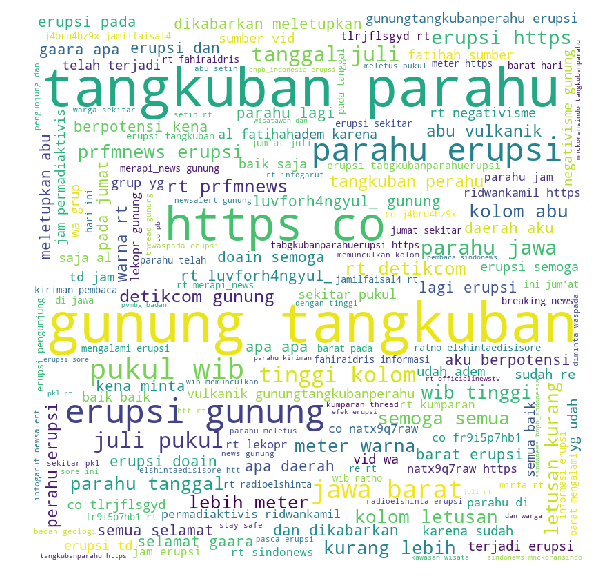

In [13]:
# Python program to generate WordCloud 

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
import pandas as pd 


# Reads 'Youtube04-Eminem.csv' file 
#df = pd.read_csv("Psy.csv", encoding ="latin-1") 

comment_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df.Tweets: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
		
	for words in tokens: comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


In [14]:
#array tweet tanggal 26
tanggal_dua_enam = [count_enam_ke_delapan_26, count_delapan_ke_sepuluh_26,count_sepuluh_ke_duabelas_26,count_duabelas_ke_empat_belas_26,count_empatbelas_ke_enam_belas_26, count_enambelas_ke_delapan_belas_26, count_delapan_belas_ke_dua_puluh_26, count_dua_puluh_ke_dua_puluh_dua_26, count_dua_puluh_dua_ke_dua_belas_malam_26]
print ('Tweet Tanggal 26 : ' + str(tanggal_dua_enam))

tanggal_dua_tujuh = [count_nol_nol_ke_dua_27, count_dua_ke_empat_27, count_empat_ke_enam_27, count_enam_ke_delapan_27, count_delapan_ke_sepuluh_27,count_sepuluh_ke_duabelas_27,count_duabelas_ke_empat_belas_27,count_empatbelas_ke_enam_belas_27, count_enambelas_ke_delapan_belas_27, count_delapan_belas_ke_dua_puluh_27, count_dua_puluh_ke_dua_puluh_dua_27, count_dua_puluh_dua_ke_dua_belas_malam_27]
print ('Tweet Tanggal 27 : ' + str(tanggal_dua_tujuh))

Tweet Tanggal 26 : [0, 62, 2307, 876, 375, 148, 53, 42, 0]
Tweet Tanggal 27 : [85, 97, 107, 58, 70, 39, 26, 18, 18, 0, 0, 0]


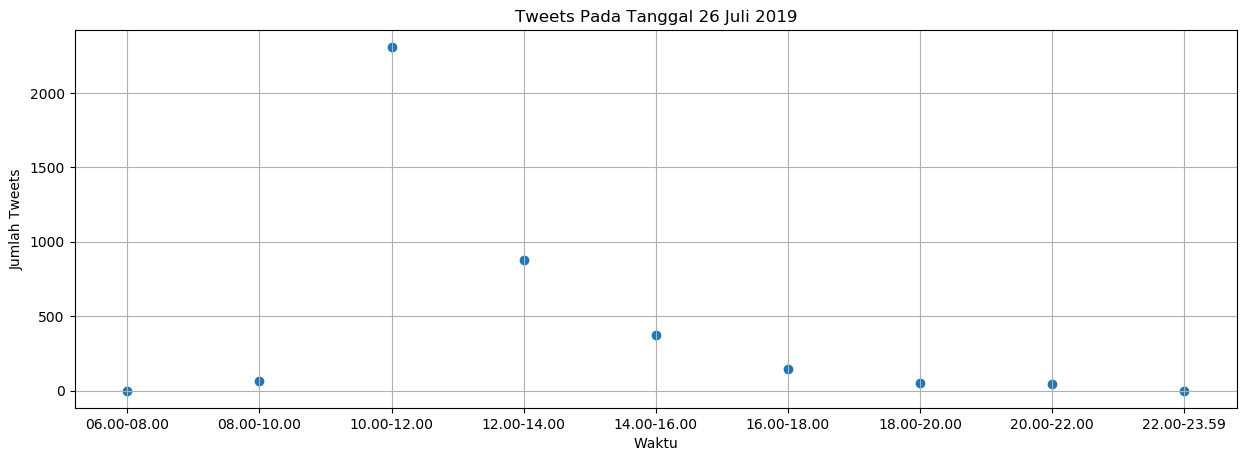

In [20]:
#membuat plot 
import matplotlib.pyplot as plt
import seaborn as sns

label_dua_enam=['06.00-08.00','08.00-10.00','10.00-12.00','12.00-14.00','14.00-16.00','16.00-18.00','18.00-20.00','20.00-22.00','22.00-23.59']
plt.figure(figsize=(15,5),dpi=100)
plt.scatter(label_dua_enam,tanggal_dua_enam)
plt.xlabel('Waktu')
plt.ylabel('Jumlah Tweets')
plt.title('Tweets Pada Tanggal 26 Juli 2019')
plt.grid(True)

plt.show()

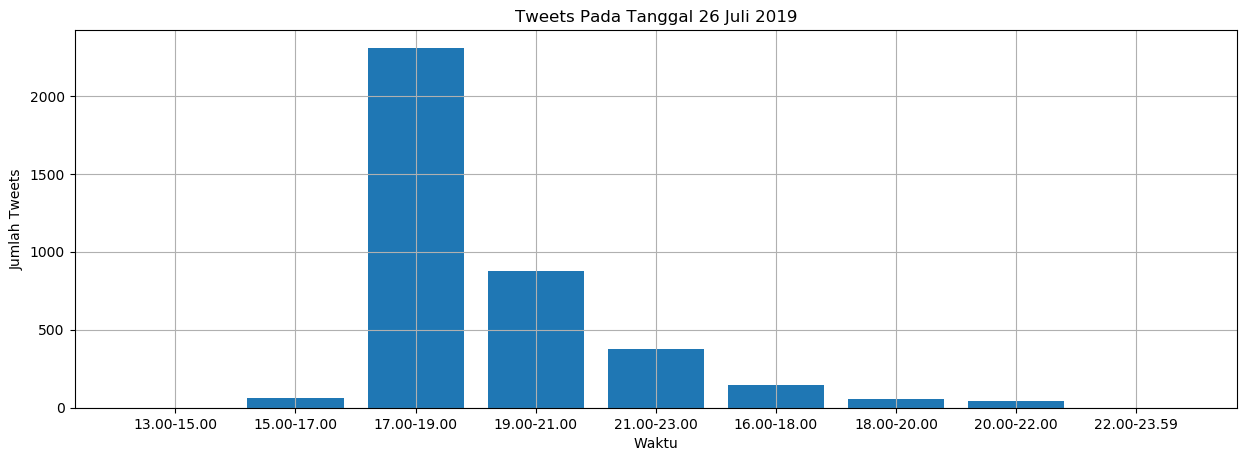

In [22]:
#membuat plot 


label_dua_enam=['13.00-15.00','15.00-17.00','17.00-19.00','19.00-21.00','21.00-23.00','16.00-18.00','18.00-20.00','20.00-22.00','22.00-23.59']
plt.figure(figsize=(15,5),dpi=100)
plt.bar(label_dua_enam,tanggal_dua_enam)
plt.xlabel('Waktu')
plt.ylabel('Jumlah Tweets')
plt.title('Tweets Pada Tanggal 26 Juli 2019')
plt.grid(True)
plt.show()